In [1]:
import numpy as np
from matplotlib import pyplot as plt

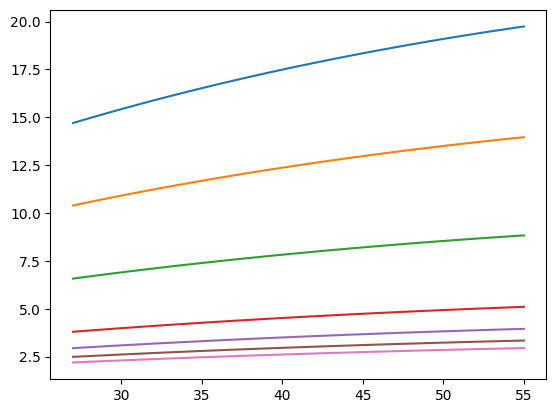

In [17]:
# Equations from "Estimating Ocean Vector Winds and Currents Using a Ka-Band Pencil-Beam Doppler Scatterometer" by E. Rodriguez

Lambda = 0.055 # m
M = np.append(np.array([1,2]), np.arange(5, 50,10)) # number of sample pairs (below eq. 6.21 from "Doppler radar and weather observations" by Richard J. Doviak)
Np = M
phi = np.deg2rad(np.linspace(27, 55)) # rad, incidence angle 
Td = 0.35e-3 # s # below eq. 7
Tw = 0.2 # m/s # below eq. 7
Tb = 1.15e-4 #pulse pair delay
SNR = 1
gamma_N = SNR / (1 + SNR) # above eq. 4
k = 2*np.pi / Lambda
T = (Tw**(-2) + Td**(-2) * np.sin(phi)**2)**2 # eq. 12
Tc = T * np.sqrt(1 + np.log10(gamma_N)) # eq. 11 FIXME log10 or log?
( Td**(-2) )**2 

vr_var = 1 / (2*k*Tb)**2 * Tb * np.outer(1/Np, np.sqrt(Tw**(-2) + Td**(-2) * np.sin(phi)**2 ))

_ = plt.plot(np.rad2deg(phi), np.sqrt(vr_var.T))

In [18]:
# equations from "Doppler radar and weather observations" by Richard J. Doviak

sigma_v = np.linspace(0,10) # m/s
var_v = sigma_v**2

T_s = 1.15e-4 # sample separation time (time between bursts), s
N_S = 1 # noise to signal ration approx 1

# eq. 6.5
corr_T_s = np.exp(-8*(np.pi * sigma_v * T_s / Lambda)**2) 

# eq. 6.11b 
def sigma_n(sigma, T_s, Lambda):
    return 2 * sigma * T_s / Lambda
sigma_vn = sigma_n(sigma_v, T_s, Lambda)

# eq. 6.22b # NOTE if sample pairs are independent
v_var1 = Lambda**2 * (32 * np.pi**2 * np.outer(M, corr_T_s**2) * T_s**2)**(-1) * ((1 + N_S)**2 - corr_T_s**2) 
v1_std = np.sqrt(v_var1)

# eq. 6.23 NOTE only for high SNR, narrow spectral widths and contiguous pairs
v_var2 = np.outer(sigma_v * Lambda , 1 / (8 * M * T_s * np.sqrt(np.pi)))
v2_std = np.sqrt(v_var2)

# eq. 6.26 NOTE only for gaussian spectra and very high correlation been pulses 
v_var3 = np.outer(Lambda**2 / (4*M*T_s**2), sigma_vn / (4*np.sqrt(np.pi)) + 2*sigma_vn**2 * N_S + 1 / 12 * N_S**2)
v3_std = np.sqrt(v_var3)

# eq. 6.38 NOTE only for high SNR
v_var_crlb1 = 3 * Lambda**2 * sigma_vn**4 / (np.outer(M * T_s**2, (1 - 12*sigma_vn**2)))
v1_crlb_std = np.sqrt(v_var_crlb1)

# eq. 6.39 NOTE only for low SNR
v_var_crlb2 = np.sqrt(np.pi) * Lambda**2 * np.outer(sigma_vn**3, 1 / (M*T_s**2))  * N_S**2
v2_crlb_std = np.sqrt(v_var_crlb2)


Text(0, 0.5, '$\\sigma_{\\hat{v}}$ [$m/s$]')

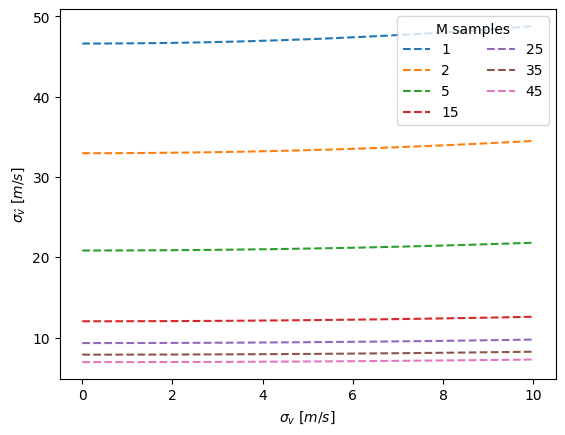

In [19]:
_ = plt.plot(sigma_v, v1_std.T, '--')
# _ = plt.plot(sigma_v, v2_std, '.')
# _ = plt.plot(sigma_v, v3_std.T, '-.')
# _ = plt.plot(sigma_v, v1_crlb_std.T, label= 'large SNR')
# _ = plt.plot(sigma_v, v2_crlb_std, ':', label= 'small SNR')
_ = plt.legend([str(i) for i in M], ncol =2, title = "M samples")
plt.xlabel('$\sigma_v$ [$m/s$]')
plt.ylabel('$\sigma_{\hat{v}}$ [$m/s$]')
# plt.ylim([0, 5])
# 

In [24]:
rho = np.linspace(0.5,1, 11)
v_var1 = Lambda**2 * (32 * np.pi**2 * np.outer(M, rho**2) * T_s**2)**(-1) * ((1 + N_S)**2 - rho**2) 
v1_std = np.sqrt(v_var1)

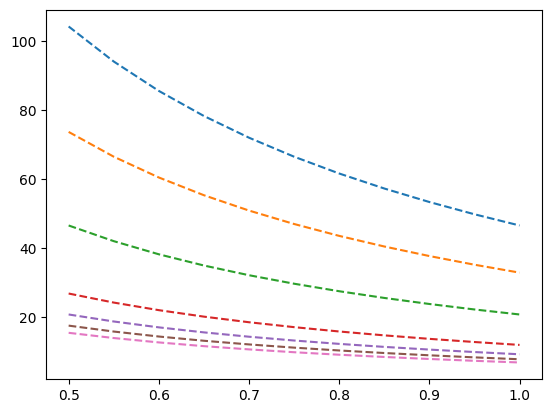

In [25]:
_ = plt.plot(rho, v1_std.T, '--')

In [27]:
rho

array([0.5 , 0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])